In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
# chargement des données
data = pd.read_csv("data_RH.csv")
df = data.copy()
# df = df.reset_index() convertir les index en colonne 
df = df.reset_index(drop=True)

df = df.drop(columns=['EmpID','PositionID', 'State','MarriedID','RaceDesc','DaysLateLast30','SpecialProjectsCount','HispanicLatino', 'Employee_Name','ManagerName', 'MaritalStatusID', 'GenderID','EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'ManagerID'])
df.head()

,Salary,Termd,Position,Zip,DOB,Sex,MaritalDesc,CitizenDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,LastPerformanceReview_Date,Absences
0,62506.0,0.0,Production Technician I,1960.0,07/10/83,M,Single,US Citizen,7/5/2011,NaN,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,4.60,5.0,1/17/2019,1.0
1,104437.0,1.0,Sr. DBA,2148.0,05/05/75,M,Married,US Citizen,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3.0,2/24/2016,17.0
2,64955.0,1.0,Production Technician II,1810.0,09/19/88,F,Married,US Citizen,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3.0,5/15/2012,3.0
3,64991.0,0.0,Production Technician I,1886.0,09/27/88,F,Married,US Citizen,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.84,5.0,1/3/2019,15.0
4,50825.0,1.0,Production Technician I,2169.0,09/08/89,F,Divorced,US Citizen,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4.0,2/1/2016,2.0


Nettoyage des données 

In [ ]:
# sns.heatmap(df.isna(), cbar=False) : pour visualiser dans un graphique heatmap
df.isna().sum()   # la variable DateofTermination contient 211 valeur manquante

In [53]:
df.drop("DateofTermination",axis=1, inplace=True)

In [54]:
df.columns

Index(['Salary', 'Termd', 'Position', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'DateofHire', 'TermReason', 'EmploymentStatus',
       'Department', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'LastPerformanceReview_Date',
       'Absences'],
      dtype='object')

In [71]:
#  variabl categorielle : sex , MaritalDesc, CitizenDesc, 
# RaceDesc, EmploymentStatus, Department, RecruitmentSource, PerformanceScore, 
# EmpSatisfaction, SpecialProjectsCount, DaysLateLast30, Absences 

# variable continues : salaire, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Salary                      307 non-null    float64
 1   Termd                       307 non-null    float64
 2   Position                    307 non-null    object 
 3   Zip                         307 non-null    float64
 4   DOB                         307 non-null    object 
 5   Sex                         307 non-null    object 
 6   MaritalDesc                 307 non-null    object 
 7   CitizenDesc                 307 non-null    object 
 8   DateofHire                  307 non-null    object 
 9   TermReason                  307 non-null    object 
 10  EmploymentStatus            307 non-null    object 
 11  Department                  307 non-null    object 
 12  RecruitmentSource           307 non-null    object 
 13  PerformanceScore            307 non


* Distribution des salaires, satisfaction des employés, scores de perfomance

In [ ]:
fig  = px.histogram(df, x="Salary",nbins=20)  # bins=20 signifie qu'on divise la plage des salaires en 20 intervalles.
fig.show()

Les distributions des salaires par departement en fonction du Sexe

In [78]:
fig = px.box(df, x="Department", y="Salary", color="Sex")
fig.show()

Distribution du departement

In [58]:
fig = px.histogram(df, x="Department")
fig.show()

Salaire moyen pour chaque Metier

In [92]:
# Distribution du salaire 
salaire_moyen = df.groupby('Position')["Salary"].mean().sort_values(ascending=False)
salaire_moyen.head(10)
# sns.barplot(data=salaire_moyen, x=salaire_moyen.index, y=salaire_moyen.values)

Position
President & CEO             250000.0
CIO                         220450.0
Director of Sales           180000.0
IT Director                 178000.0
Director of Operations      170500.0
IT Manager - Infra          157000.0
Data Architect              150290.0
IT Manager - DB             144959.5
IT Manager - Support        138888.0
Principal Data Architect    120000.0
Name: Salary, dtype: float64

Etude sur les metiers de la Data     
- Quel metier de la data paie le mieux 

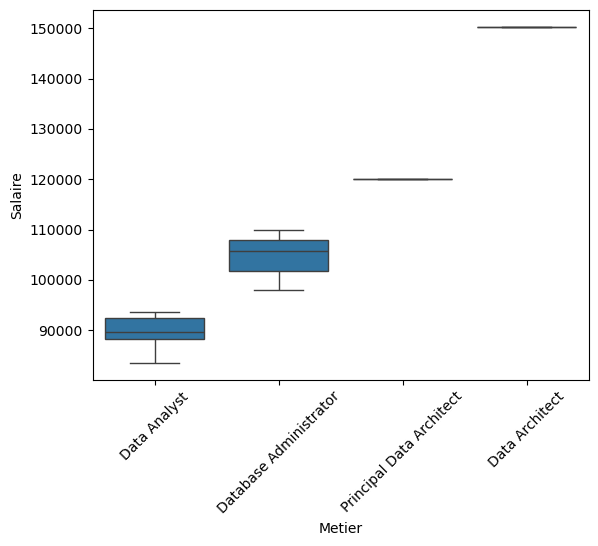

In [106]:
df["Position"] = df["Position"].str.strip()
metier_data =  df[df["Position"].str.contains("Data",case=False, na=False)]
sns.boxplot(data=metier_data, y="Salary", x="Position")
plt.xticks(rotation= 45)
plt.xlabel("Metier")
plt.ylabel("Salaire")
plt.show()

**Scrore de performance**   
  - Fully meets : l'équipe satisfait pleinement les attentes.  
  - Exceeds : L'individu ou l'équipe surpasse régulièrement les objectifs définis, en apportant une valeur ajoutée ou des résultats exceptionnels.  
  - Needs Improvement :la performance est inférieure aux attentes. Des efforts ou des ajustements sont nécessaires pour atteindre les objectifs fixés.  
  - PIP : Indique une situation critique où la performance est jugée insuffisante et nécessite une intervention immédiate. 



In [43]:
# df_bis["PerformanceScore"].value_counts(normalize=True).plot(kind="bar", rot=30)
df["PerformanceScore"].value_counts(normalize=True)

PerformanceScore
Fully Meets          0.781759
Exceeds              0.120521
Needs Improvement    0.055375
PIP                  0.042345
Name: proportion, dtype: float64

D'aprés ce graphique 78 % des personnes travaillant dans cette entreprise satisfaitent pleinemnt aux attentes , seulement un petit nombre de personne ont de lacune et qui ont besoin un coup de main (des formations ....).   
ces personnes qui ont besoin d'aide qui sont-ils ?

**La relation entre le salaire et le score de performance** 

Text(41.94681249999999, 0.5, 'Salaire')

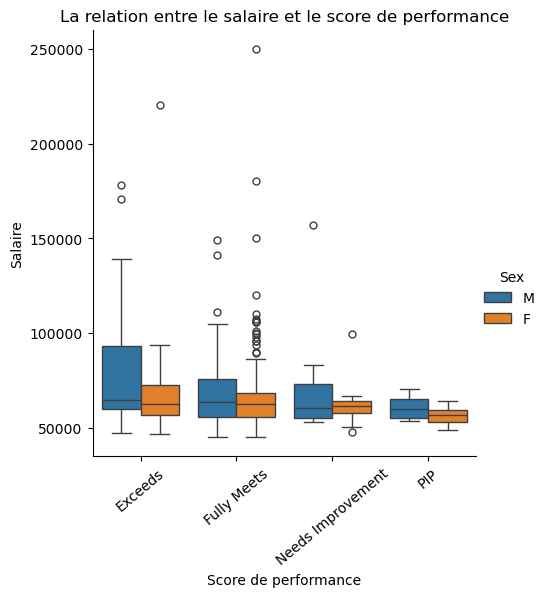

In [126]:
sns.catplot(data=df,y="Salary",x="PerformanceScore",hue="Sex", kind="box")
plt.xticks(rotation=40)
plt.title("La relation entre le salaire et le score de performance")
plt.xlabel("Score de performance")
plt.ylabel("Salaire")


**Meilleur source de recrutement** 

Text(0.5, 0, 'Source de recrutement')

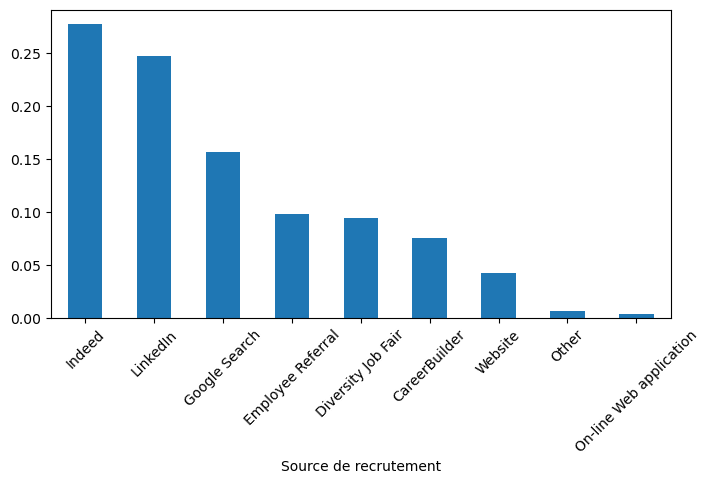

In [165]:
plt.figure(figsize=(8,4))
df["RecruitmentSource"].value_counts(normalize=True).plot(kind='bar', rot=45)
plt.xlabel("Source de recrutement")

Les meilleurs sources de recrutement sur cette entreprise sont Indeed et LinkedIn

heures travaillées pour détecter les facteurs d'amélioration.  

Identifier l'année avec le plus de recrutement 

In [166]:
# conversion en datetime
df["DateofHire"] = pd.to_datetime(df["DateofHire"], errors="coerce")


df["Year_of_hire"] = df["DateofHire"].dt.year # Extraire les années de recrutement

# Les d'années d'embauche 
recrutements_par_annee = df["Year_of_hire"].value_counts().sort_index()
figure = px.bar(
    recrutements_par_annee, 
    x=recrutements_par_annee.index, 
    y=recrutements_par_annee.values, 
    title="Nombre de Recrutements par Année",
    labels={"x": "Années", "y": "Nombre de recrutements"}
)

figure.show()

Ce graphique montre les années où l'entreprise a recruté et met en évidence que l'entreprise a recruté plus de personnes en 2011 que les autres années. À partir de 2014, le nombre de recrutements diminue progressivement

Analyse par mois

In [167]:

df["MonthOfHire"] = df["DateofHire"].dt.month

# compter le nombre de recrutement par mois
recrutement_mois = df["MonthOfHire"].value_counts().sort_values() 
fig = px.bar(recrutement_mois,
             x= recrutement_mois.index,
             y= recrutement_mois.values,
             title = "Les mois avec plus de recutement",
             labels={"x":"Année", "y":"Nombre de recrutement"},
             text_auto=True)

# personnalisation des axes (on remplace les chiffres par les noms de mois)

fig.update_xaxes(
    tickmode="array",
    tickvals=list(range(1,13)),
    ticktext=[
        "Jan", "Fév", "Mar", "Avr", "Mai", "Juin", 
        "Juil", "Août", "Sep", "Oct", "Nov", "Déc"
    ]
)


Recrutements par Année et Mois

In [169]:
df["YearMonth"] = df["DateofHire"].dt.to_period("M")
recrutements_par_annee_mois = df["YearMonth"].value_counts().sort_index()

fig = px.line(
    x=recrutements_par_annee_mois.index.astype(str), 
    y=recrutements_par_annee_mois.values,
    title="Évolution des Recrutements par Mois et Année",
    labels={"x": "Année-Mois", "y": "Nombre de recrutements"}
)
fig.show()

Les abscences